# MSBD566 - Lecture 5

## Classification - Logistic Regression




In [2]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## One feature

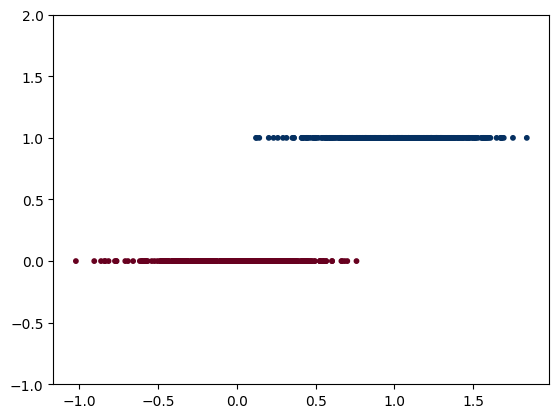

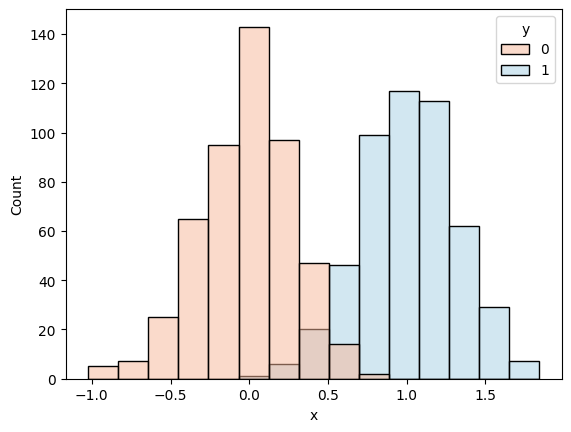

In [3]:
# Create dummy data
n_pts = 1000
std = 0.3

x1 = np.random.normal(0, std, n_pts//2)
x2 = np.random.normal(1, std, n_pts//2)
X = np.concatenate((x1,x2),axis=0).reshape(-1,1)

y1 = np.zeros(n_pts//2)
y2 = np.ones(n_pts//2)
y = np.concatenate((y1,y2),axis=0).astype(int)

plt.scatter(X[:,0],y,c=y, cmap='RdBu',s=10)
plt.ylim(-1,2)
plt.show()

df = pd.DataFrame( {"x":X[:,0], "y":y} )
sns.histplot( data=df, x='x', hue='y', bins=15, palette='RdBu' )
plt.show()

#### Modeling
We need to train data to teach the model, and testing data to see if it generalizes well

Separate data into two groups for training

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y
)

print("Original data:")
print(pd.Series(y).value_counts())
print()
print("Training data:")
print(pd.Series(y_train).value_counts())
print()
print("Testing data:")
print(pd.Series(y_test).value_counts())

Original data:
0    500
1    500
dtype: int64

Training data:
1    400
0    400
dtype: int64

Testing data:
0    100
1    100
dtype: int64


Training using Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

# train the model using X and Y train values
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_train_pred = model.predict(X_train).astype(int)
y_test_pred  = model.predict(X_test).astype(int)

print("Testing labels:")
print(y_test)
print("Predicted labels:")
print(y_test_pred)

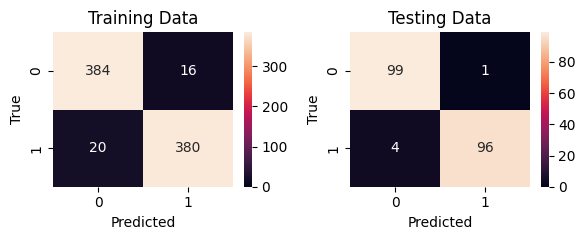

In [22]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))

# Plot confusion matrix for training data
sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title("Training Data")

# Plot confusion matrix for test data
sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title("Testing Data")

# Show the plots
plt.tight_layout()
plt.show()

In [23]:
conf_matrix_train = conf_matrix_train.astype(float)
conf_matrix_test  = conf_matrix_test.astype(float)
for i in range(conf_matrix_train.shape[0]):
    conf_matrix_train[i,:] = conf_matrix_train[i,:] / conf_matrix_train[i,:].sum()
    conf_matrix_test[i,:]  = conf_matrix_test[i,:] / conf_matrix_test[i,:].sum()

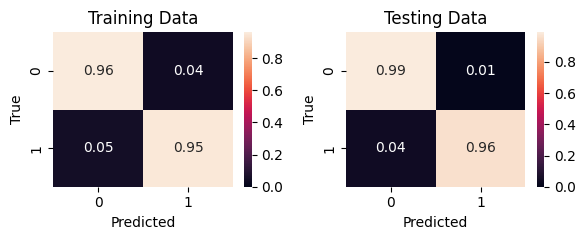

In [24]:
# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))

# Plot confusion matrix for training data
sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='.2f', ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title("Training Data")

# Plot confusion matrix for test data
sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='.2f', ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title("Testing Data")

# Show the plots
plt.tight_layout()
plt.show()